Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,Would_live_in_another_neighborhood,District,Gender,Place_of_birth,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL STAY THE SAME,IT WILL GET WORSE,...,< 50 M2,< 1000 EUROS,MIDDLE-MIDDLE,ONE,0,0,0,0,0,0
1,2008,0.0,CIUTAT VELLA,1,REST OF SPAIN,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL IMPROVE,IT WILL IMPROVE,...,51-100 M2,< 1000 EUROS,LOW,TWO,1,0,0,0,0,0
3,2008,0.0,CIUTAT VELLA,0,REST OF CATALONIA,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL IMPROVE,IT WILL GET WORSE,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
5,2008,0.0,CIUTAT VELLA,0,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL IMPROVE,IT WILL STAY THE SAME,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
6,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,...,51-100 M2,< 1000 EUROS,LOW,ONE,0,0,1,0,0,0


In [5]:
data.shape

(15091, 40)

In [6]:
data.columns.tolist()

['ANY',
 'Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Place_of_birth',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [7]:
x_var = data.columns.tolist()

In [8]:
for i in ['ANY', 'Would_live_in_another_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport',
          'BCN_citizen_security', 'BCN_management']:
    x_var.remove(i)

In [9]:
x = data[x_var]

In [10]:
y = data['Would_live_in_another_neighborhood']

In [11]:
x = pd.get_dummies(x, drop_first=True)

In [12]:
x.columns.tolist()

['Gender',
 'Owns_a_car',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'Place_of_birth_FOREIGN',
 'Place_of_birth_REST OF CATALONIA',
 'Place_of_birth_REST OF SPAIN',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_evolution_IT IS THE SAME',
 'Barri_evolution_IT IS WORSE',
 'Barri_future_IT WILL IMPROVE',
 'Barri_future_IT WILL STAY THE SAME',
 'Barri_satisfaction_of_living_NOT SATISFIED',
 'Barri_satisfaction_of_living_SATISFIED',
 'Barri_citizen_security_GOOD',
 'Barri_citizen_security_NEITHER BAD, NOR GOOD',
 'Barri_management_GOOD',
 'Barri_management_NEITHER B

In [13]:
x = sm.add_constant(x)

In [14]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277509
         Iterations 8
                                            Results: Logit
Model:                      Logit                                    Pseudo R-squared:       0.192    
Dependent Variable:         Would_live_in_another_neighborhood       AIC:                    8521.7888
Date:                       2021-05-02 12:49                         BIC:                    9078.1841
No. Observations:           15091                                    Log-Likelihood:         -4187.9  
Df Model:                   72                                       LL-Null:                -5181.0  
Df Residuals:               15018                                    LLR p-value:            0.0000   
Converged:                  1.0000                                   Scale:                  1.0000   
No. Iterations:             8.0000                                                                    
---------------

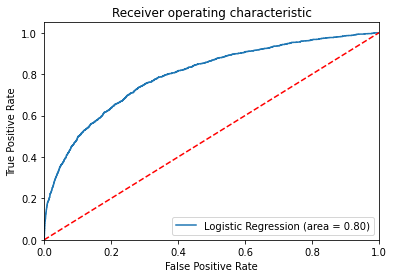

In [15]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
for i in ['House_size', 'Monthly_family_income', 'Social_class']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
for i in ['BCN_over_barri_evolution', 'BCN_over_barri_management', 'Barri_evolution', 'Barri_future',
         'Barri_management', 'STREETS CLEANING', 'URBANISM', 'ASPHALT AND STREET CONSERVATION', 'CIRCULATION',
         'PARKING', 'SUBWAY']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
for i in ['BCN_over_barri_citizen_security', 'Barri_citizen_security', 'BUS', 'Barri_transport']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
for i in ['Gender']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)
x = sm.add_constant(x)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
print(result.get_margeff().summary())

In [ ]:
result.pred_table()

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()